**STEP 1: Get the dataset**

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://risk-engineering.org/static/data/CCPP.csv')

In [ ]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# Let's do a multidimensional scatterplot

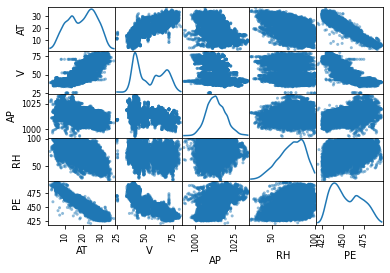

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, diagonal="kde");

In [ ]:
def feature_relation(clName, df):
    cols = [a for a in df.columns if a not in ['PE']]
    i=1
    plt.figure(figsize = (12,12))

    for cl in cols:
        plt.subplot(4,3,i)
        # uncomment this line if you want to add colors to the scatter
        #plt.scatter(df[clName], df[cl], c=[df['class']],label= ['1','2'])
        plt.scatter(df[clName], df[cl])
        i+=1
    plt.legend(loc='upper left')    
    plt.show()

No handles with labels found to put in legend.


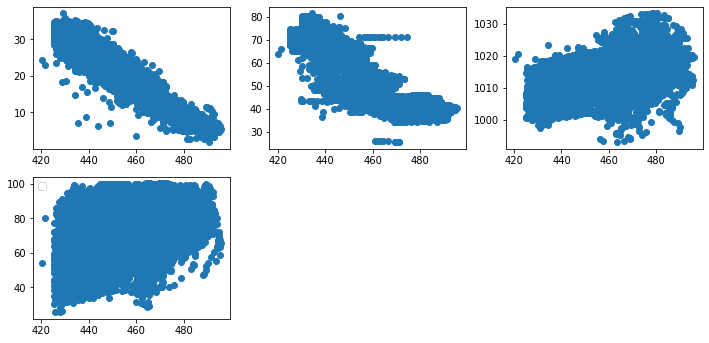

In [ ]:
feature_relation('PE', data)   

In [ ]:
# AT and V are most predictive because we can see that there are approximately linear relationships between PE and the negative of AT and between PE and the negative of V

In [ ]:
# plot of PE as a function of AT and V

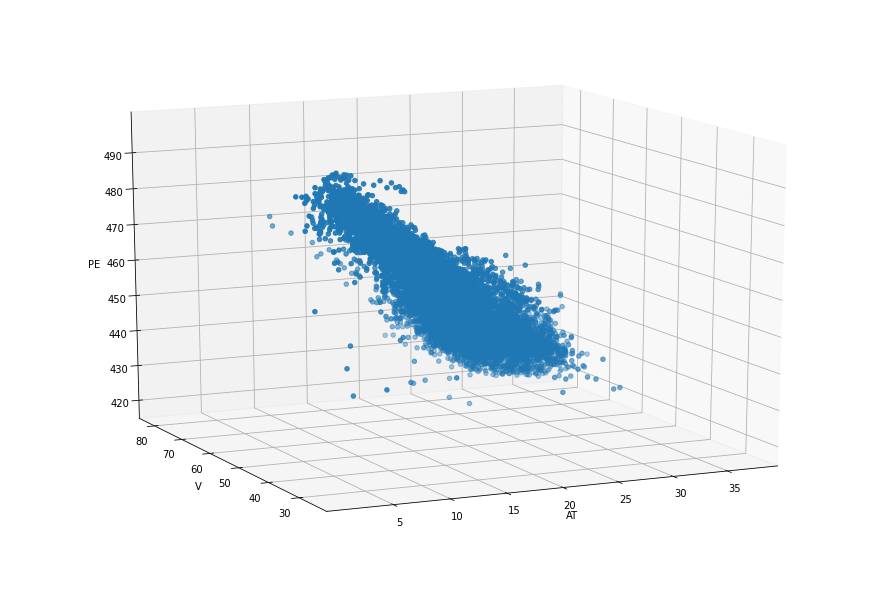

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(data["AT"], data["V"], data["PE"])
ax.set_xlabel("AT")
ax.set_ylabel("V")
ax.set_zlabel("PE")
ax.set_facecolor("white")

In [ ]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


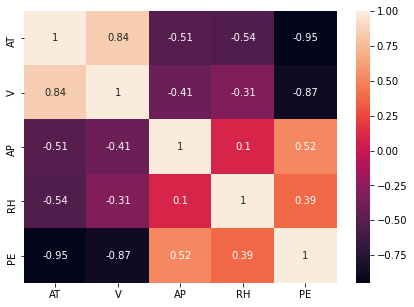

In [ ]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(data.corr(), annot = True)

In [ ]:
# The correlations also confirm that AT and V have a strong negative correlation with PE as their correlation coefficients are -0.95 and -0.87 respectively.

In [ ]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
#Standardisation 
data= (data-data.mean())/data.std()

In [ ]:
data

,AT,V,AP,RH,PE
0,-0.629486,-0.987245,1.820393,-0.009519,0.521181
1,0.741870,0.681010,1.141803,-0.974570,-0.585634
2,-1.951195,-1.172956,-0.185068,1.289772,2.003574
3,0.162197,0.237191,-0.508366,0.228148,-0.462003
4,-1.185007,-1.322470,-0.678435,1.596616,1.144606
...,...,...,...,...,...
9563,-0.402716,-0.363223,0.126444,1.211692,0.331927
9564,-0.866992,-1.190268,1.753039,-0.447182,0.893830
9565,1.565758,1.575729,-0.057096,-2.522486,-1.452805
9566,0.647942,1.191716,0.101186,-0.747861,-1.091288


In [ ]:
def split_data(dataset, split_percent=0.6):
  features_train = dataset.drop(columns=['PE']).sample(frac=split_percent)
  target_train = dataset['PE'][features_train.index]

  features_test= dataset.drop(columns=['PE']).drop(features_train.index)
  target_test = dataset['PE'][features_test.index]
  return features_train.values,target_train.values, features_test.values, target_test.values


In [ ]:
features_train,target_train, features_test, target_test = split_data(data,0.8)

In [ ]:
features_train

array([[-1.55937913, -1.12023321,  0.47163223, -1.77044534],
       [ 1.06525291,  1.39001771, -0.77778185,  1.02128409],
       [ 1.6247987 ,  0.96272421, -1.72410357, -1.62113302],
       ...,
       [ 0.88276316,  0.72822428,  0.05235446, -0.51361916],
       [-1.26954246, -1.35079857, -0.0874048 ,  0.01171363],
       [ 0.80225297, -0.42381563, -0.55046258, -2.64851137]])

In [ ]:
target_train

array([ 1.97193417, -0.99812588, -1.41706313, ..., -0.79480948,
        1.20964415, -0.84930062])

**STEP 2: Model Implementation**

In [ ]:
class Batch_GD:
  def __init__(self, number_iter, lrng_rate, features, target):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])

  def loss(self, predictions):
    mse = (1/len(self.target)) * np.sum((predictions - self.target)**2)
    return mse

  def gradient(self, predictions):
    grdt = (1/len(self.target)) * self.features.T @ (predictions - self.target)
    return grdt

  def train(self):
    cost = []
    for i in range(self.number_iter):
      predictions = self.features @ self.theta
      gradient = self.gradient(predictions)
      self.theta -= self.lrng_rate * gradient
      cost.append(self.loss(predictions))
    return cost

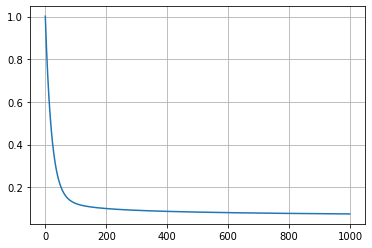

In [ ]:
bgd = Batch_GD(1000, 0.01,features_train,target_train)
cost = bgd.train()
plt.plot(cost)
plt.grid()

In [ ]:
class Stochastic_GD:
  def __init__(self, number_iter, lrng_rate, features, target):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N)
    
    return cost_value

  def sgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(len(self.target)):
        predictions = self.features[i] .dot(self.theta)
        error = predictions - self.target[i]
       
        gradient = (2*self.features[i].T .dot(error))/len(self.target)
        self.theta -= self.lrng_rate * gradient
        cost=self.loss()
        # error = (1/len(self.target))*((self.features[i] @ self.theta) - self.target[i])
        costs.append(cost)
    return costs
      


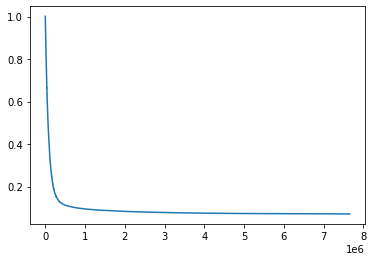

In [ ]:
test = Stochastic_GD(1000, 0.01,features_train,target_train)
cost_sgd = test.sgd()
#print(cost_sgd)
plt.plot(cost_sgd)
plt.show()

In [ ]:
class Mini_batch_GD:
  def __init__(self, number_iter, lrng_rate, batch_size, features, target):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.batch_size = batch_size
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N)
    
    return cost_value

  def mbgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(int(np.ceil(len(self.target)/self.batch_size))):
      # for i in range(len(self.target)//self.batch_size):
        start = i*self.batch_size
        end = start + self.batch_size
        predictions = self.features[start:end] @ self.theta
        error = predictions - self.target[start:end]
        gradient = self.features[start:end].T @ error
        self.theta -= self.lrng_rate * gradient
      cost = self.loss()
      costs.append(cost)
      # mse = (1/self.batch_size) * np.sum((predictions - self.target[start:end])**2)
      # cost.append(mse)
    return costs

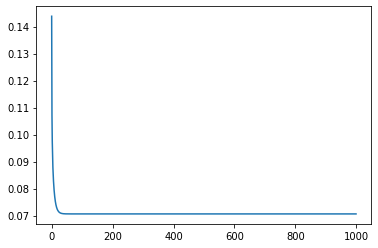

In [ ]:
test = Mini_batch_GD(1000, 0.0001,100,features_train,target_train)
cost_mbgd = test.mbgd()
plt.plot(cost_mbgd)

**STEP 3: Fitting the model**

In [ ]:
new_col = [1]*len(target_train)
features_train = np.insert(features_train,0,1,axis=1) 
features_train

array([[ 1.        ,  1.        , -1.55937913, -1.12023321,  0.47163223,
        -1.77044534],
       [ 1.        ,  1.        ,  1.06525291,  1.39001771, -0.77778185,
         1.02128409],
       [ 1.        ,  1.        ,  1.6247987 ,  0.96272421, -1.72410357,
        -1.62113302],
       ...,
       [ 1.        ,  1.        ,  0.88276316,  0.72822428,  0.05235446,
        -0.51361916],
       [ 1.        ,  1.        , -1.26954246, -1.35079857, -0.0874048 ,
         0.01171363],
       [ 1.        ,  1.        ,  0.80225297, -0.42381563, -0.55046258,
        -2.64851137]])

# L2 regularisation 

In [ ]:
class Batch_GDR2:
  def __init__(self, number_iter, lrng_rate, features, target,lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self, predictions):

    mse = ((1/len(self.target)) * np.sum((predictions - self.target)**2)) + (self.lamda)*np.sum(np.square(self.theta))
    return mse

  def gradient(self, predictions):
    grdt = (1/len(self.target)) * self.features.T @ (predictions - self.target)
    return grdt

  def train(self):
    cost = []
    for i in range(self.number_iter):
      predictions = self.features @ self.theta
      gradient = self.gradient(predictions) 
      gradient[1:]+= 2*(self.lamda)*(self.theta[1:])
      self.theta -= self.lrng_rate * gradient
      cost.append(self.loss(predictions))
    return cost

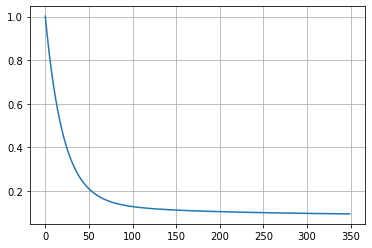

In [ ]:
bgd = Batch_GDR2(350, 0.01,features_train,target_train,0.01)
cost = bgd.train()
plt.plot(cost)
plt.grid()

In [ ]:
class Stochastic_GD2:
  def __init__(self, number_iter, lrng_rate, features, target, lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N) + (self.lamda)*np.sum(np.square(self.theta))
    
    return cost_value

  def sgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(len(self.target)):
        predictions = self.features[i] .dot(self.theta)
        error = predictions - self.target[i]
       
        gradient = (2*self.features[i].T .dot(error))/len(self.target)
        gradient[1:]+= 2*(self.lamda)*(self.theta[1:])
        self.theta -= self.lrng_rate * gradient
        cost=self.loss()
        # error = (1/len(self.target))*((self.features[i] @ self.theta) - self.target[i])
        costs.append(cost)
    return costs
      


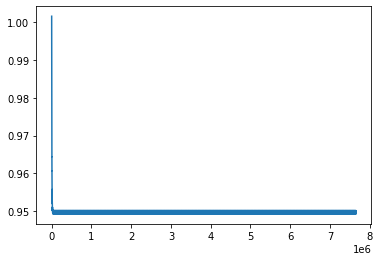

In [ ]:
test = Stochastic_GD2(1000, 0.01,features_train,target_train,0.01)
cost_sgd = test.sgd()
#print(cost_sgd)
plt.plot(cost_sgd)
plt.show()

In [ ]:
class Mini_batch_GD2:
  def __init__(self, number_iter, lrng_rate, batch_size, features, target, lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.batch_size = batch_size
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N) + (self.lamda)*np.sum(np.square(self.theta))
    
    return cost_value

  def mbgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(int(np.ceil(len(self.target)/self.batch_size))):
      # for i in range(len(self.target)//self.batch_size):
        start = i*self.batch_size
        end = start + self.batch_size
        predictions = self.features[start:end] @ self.theta
        error = predictions - self.target[start:end]
        gradient = self.features[start:end].T @ error
        gradient[1:]+= 2*(self.lamda)*(self.theta[1:])
        self.theta -= self.lrng_rate * gradient
      cost = self.loss()
      costs.append(cost)
      # mse = (1/self.batch_size) * np.sum((predictions - self.target[start:end])**2)
      # cost.append(mse)
    return costs

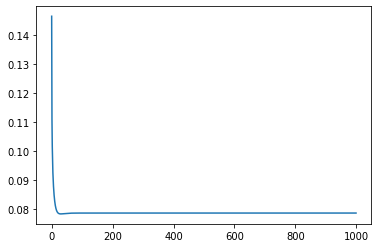

In [ ]:
test = Mini_batch_GD2(1000, 0.0001,100,features_train,target_train,0.01)
cost_mbgd = test.mbgd()
plt.plot(cost_mbgd)

## L1 regularisation 

In [ ]:
class Batch_GDR1:
  def __init__(self, number_iter, lrng_rate, features, target,lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self, predictions):

    mse = ((1/len(self.target)) * np.sum((predictions - self.target)**2)) + (self.lamda)*np.abs(self.theta)
    return mse

  def gradient(self, predictions):
    grdt = (1/len(self.target)) * self.features.T @ (predictions - self.target)
    return grdt

  def train(self):
    cost = []
    for i in range(self.number_iter):
      predictions = self.features @ self.theta
      gradient = self.gradient(predictions) 
      gradient[1:]+= (self.lamda)*np.sign(self.theta[1:])
      self.theta -= self.lrng_rate * gradient
      cost.append(self.loss(predictions))
    return cost

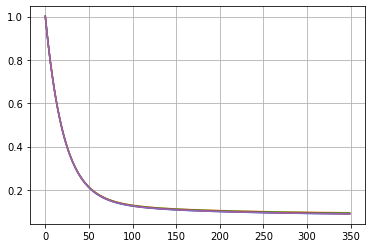

In [ ]:
bgd = Batch_GDR1(350, 0.01,features_train,target_train,0.01)
cost = bgd.train()
plt.plot(cost)
plt.grid()

In [ ]:
class Stochastic_GD1:
  def __init__(self, number_iter, lrng_rate, features, target, lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N) + (self.lamda)*np.abs(self.theta)
    
    return cost_value

  def sgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(len(self.target)):
        predictions = self.features[i] .dot(self.theta)
        error = predictions - self.target[i]
       
        gradient = (2*self.features[i].T .dot(error))/len(self.target)
        gradient[1:]+= (self.lamda)*np.sign(self.theta[1:])
        self.theta -= self.lrng_rate * gradient
        cost=self.loss()
        # error = (1/len(self.target))*((self.features[i] @ self.theta) - self.target[i])
        costs.append(cost)
    return costs

In [ ]:
# test = Stochastic_GD1(1000, 0.0001,features_train,target_train,0.001)
# cost_sgd = test.sgd()
# #print(cost_sgd)
# plt.plot(cost_sgd)
# plt.show()

In [ ]:
class Mini_batch_GD1:
  def __init__(self, number_iter, lrng_rate, batch_size, features, target, lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.batch_size = batch_size
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N) + (self.lamda)*np.abs(self.theta)
    
    return cost_value

  def mbgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(int(np.ceil(len(self.target)/self.batch_size))):
      # for i in range(len(self.target)//self.batch_size):
        start = i*self.batch_size
        end = start + self.batch_size
        predictions = self.features[start:end] @ self.theta
        error = predictions - self.target[start:end]
        gradient = self.features[start:end].T @ error
        gradient[1:]+= (self.lamda)*np.sign(self.theta[1:])
        self.theta -= self.lrng_rate * gradient
      cost = self.loss()
      costs.append(cost)
    return costs

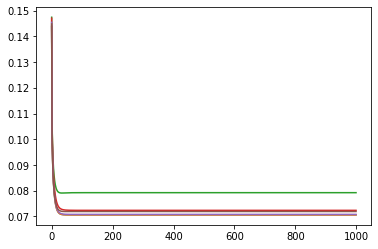

In [ ]:
test = Mini_batch_GD1(1000, 0.0001,100,features_train,target_train,0.01)
cost_mbgd = test.mbgd()
plt.plot(cost_mbgd)

# Combination of L1 and L2

In [ ]:
class Batch_GDR12:
  def __init__(self, number_iter, lrng_rate, features, target,lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self, predictions):

    mse = ((1/len(self.target)) * np.sum((predictions - self.target)**2)) + (self.lamda)*np.abs(self.theta) + (self.lamda)*np.sum(np.square(self.theta))
    return mse

  def gradient(self, predictions):
    grdt = (1/len(self.target)) * self.features.T @ (predictions - self.target)
    return grdt

  def train(self):
    cost = []
    for i in range(self.number_iter):
      predictions = self.features @ self.theta
      gradient = self.gradient(predictions) 
      gradient[1:]+= (self.lamda)*np.sign(self.theta[1:]) + 2*(self.lamda)*(self.theta[1:])
      self.theta -= self.lrng_rate * gradient
      cost.append(self.loss(predictions))
    return cost

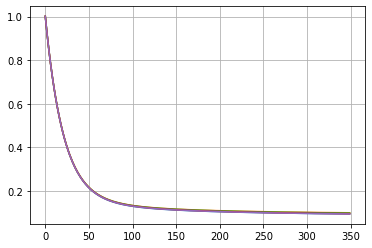

In [ ]:
bgd = Batch_GDR12(350, 0.01,features_train,target_train,0.01)
cost = bgd.train()
plt.plot(cost)
plt.grid()

In [ ]:
class Stochastic_GD12:
  def __init__(self, number_iter, lrng_rate, features, target, lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N) + (self.lamda)*np.abs(self.theta) + (self.lamda)*np.sum(np.square(self.theta))
    
    return cost_value

  def sgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(len(self.target)):
        predictions = self.features[i] .dot(self.theta)
        error = predictions - self.target[i]
       
        gradient = (2*self.features[i].T .dot(error))/len(self.target)
        gradient[1:]+= (self.lamda)*np.sign(self.theta[1:]) + 2*(self.lamda)*(self.theta[1:])
        self.theta -= self.lrng_rate * gradient
        cost=self.loss()
        costs.append(cost)
    return costs

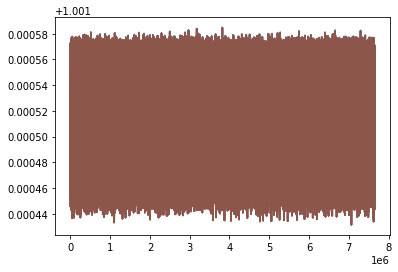

In [ ]:
test = Stochastic_GD12(1000, 0.01,features_train,target_train,0.001)
cost_sgd = test.sgd()
#print(cost_sgd)
plt.plot(cost_sgd)
plt.show()

In [ ]:
class Mini_batch_GD12:
  def __init__(self, number_iter, lrng_rate, batch_size, features, target, lamda):
    self.number_iter = number_iter
    self.lrng_rate = lrng_rate
    self.batch_size = batch_size
    self.features = features
    self.target = target
    self.theta = np.zeros(self.features.shape[1])
    self.lamda = lamda

  def loss(self):
  
    N = len(self.target)
    predictions = self.features.dot(self.theta)
    cost_value = (np.sum(np.square(predictions - self.target)))*(1/N) + (self.lamda)*np.abs(self.theta) + (self.lamda)*np.sum(np.square(self.theta))
    
    return cost_value

  def mbgd(self):
    costs = []
    for epoch in range(self.number_iter):
      for i in range(int(np.ceil(len(self.target)/self.batch_size))):
      # for i in range(len(self.target)//self.batch_size):
        start = i*self.batch_size
        end = start + self.batch_size
        predictions = self.features[start:end] @ self.theta
        error = predictions - self.target[start:end]
        gradient = self.features[start:end].T @ error
        gradient[1:]+= (self.lamda)*np.sign(self.theta[1:]) + 2*(self.lamda)*(self.theta[1:])
        self.theta -= self.lrng_rate * gradient
      cost = self.loss()
      costs.append(cost)
    return costs

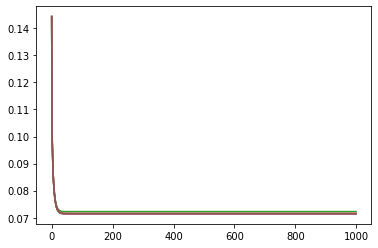

In [ ]:
test = Mini_batch_GD12(1000, 0.0001,100,features_train,target_train,0.001)
cost_mbgd = test.mbgd()
plt.plot(cost_mbgd)

In [ ]:
norms = []
for lamda in range(-10, 11):
  batchGD2 = Batch_GDR2(100, 0.1, features_train, target_train,lamda)
  batchGD2.train()
  theta = batchGD2.theta
  norms.append(np.linalg.norm(theta))

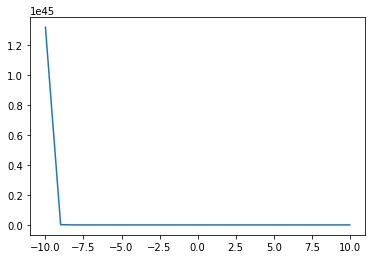

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  stGD2 = Stochastic_GD2(100, 0.1, features_train, target_train,lamda)
  stGD2.sgd()
  theta = stGD2.theta
  norms.append(np.linalg.norm(theta))

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  mbatchGD2 = Mini_batch_GD2(100, 0.0001, 100,features_train, target_train,lamda)
  mbatchGD2.mbgd()
  theta = mbatchGD2.theta
  norms.append(np.linalg.norm(theta))

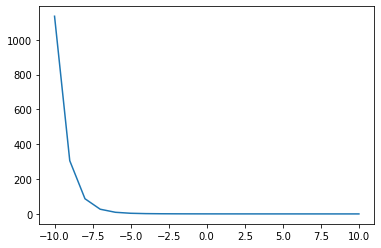

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  batchGD1 = Batch_GDR1(100, 0.1, features_train, target_train,lamda)
  batchGD1.train()
  theta = batchGD1.theta
  norms.append(np.linalg.norm(theta))

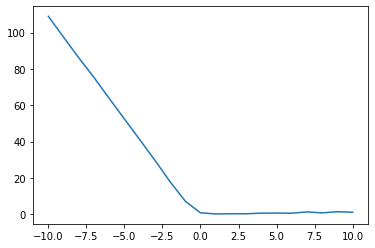

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  stGD1 = Stochastic_GD1(100, 0.1, features_train, target_train,lamda)
  stGD1.sgd()
  theta = stGD1.theta
  norms.append(np.linalg.norm(theta))

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  mbatchGD1 = Mini_batch_GD1(100, 0.0001, 100, features_train, target_train,lamda)
  mbatchGD1.mbgd()
  theta = mbatchGD1.theta
  norms.append(np.linalg.norm(theta))

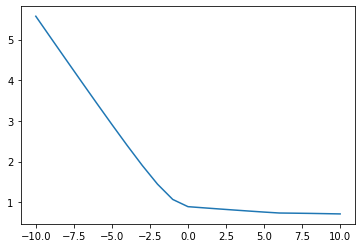

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  batchGD12 = Batch_GDR12(100, 0.1, features_train, target_train,lamda)
  batchGD12.train()
  theta = batchGD12.theta
  norms.append(np.linalg.norm(theta))

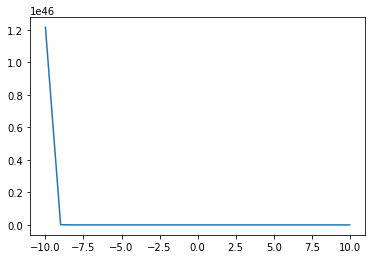

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  stGD12 = Stochastic_GD12(100, 0.1, features_train, target_train,lamda)
  stGD12.sgd()
  theta = stGD12.theta
  norms.append(np.linalg.norm(theta))

In [ ]:
plt.plot(range(-10,11) , norms)

In [ ]:
norms = []
for lamda in range(-10, 11):
  mbatchGD12 = Mini_batch_GD12(100, 000.1, 100, features_train, target_train,lamda)
  mbatchGD12.mbgd()
  theta = mbatchGD12.theta
  norms.append(np.linalg.norm(theta))